# TPE Full

In [13]:
from hyperopt import fmin, tpe, hp, Trials
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  

In [14]:
# Branin-Hoo function
def braninhoo(args):
    a = 1
    b = 5.1 / (4 * np.pi**2)
    c = 5 / np.pi
    r = 6
    s = 10
    t = 1 / (8 * np.pi)
    x1, x2 = args
    return (a * (x2 - b * x1 + c * x1 - r)**2 \
            + s * (1-t) * np.cos(x1) + s)

In [15]:
all_results = []

for evals in range(1,101):
  for iter in range(100):
    spacebh = [hp.uniform('x1', -5, 10), hp.uniform('x2', 0, 15)]
    trials = Trials()

    rstate = np.random.default_rng(np.random.randint(0,1e8))

    best = fmin(fn=braninhoo,
        space= spacebh,
        algo=tpe.suggest,
        max_evals=evals, 
        show_progressbar = False,
        rstate=rstate,
        trials = trials)
      
    results_tpe = []

    for line in trials.trials:
        results_tpe.append(line['result']['loss'])

    all_results.append(results_tpe)

In [16]:
finals = []

for elem in range(1,101):
  l3 = [x for x in all_results if len(x)==elem]
  finals.append([min(p) for p in l3])

In [17]:
def shape(lst):
    length = len(lst)
    shp = tuple(shape(sub) if isinstance(sub, list) else 0 for sub in lst)
    if any(x != 0 for x in shp):
        return length, shp
    else:
        return length

print(shape(finals))

(100, (100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100))


<ErrorbarContainer object of 3 artists>

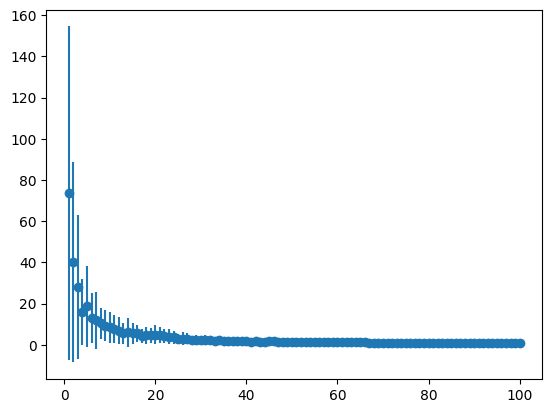

In [18]:
plt.errorbar(range(1,101), np.mean(finals, axis = 1), np.std(finals, axis = 1), fmt='o')

In [19]:
# nested list to dataframe
df = pd.DataFrame(finals)

# saving the dataframe 
df.to_csv('TPE_hyperopt.csv', index=False) 

In [21]:
df = pd.read_csv('./TPE_hyperopt.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,12.099909,14.445287,10.811830,46.487946,123.754885,27.149139,82.088841,47.426536,143.954171,113.567824,...,0.401775,159.093464,2.600306,215.969597,61.102315,278.471168,103.884013,338.255406,7.689723,41.938286
1,3.633648,54.543227,28.375791,1.204169,16.762630,49.195269,2.259670,75.072253,29.791122,43.083831,...,28.206913,27.473801,77.382625,9.144010,6.025614,41.698260,3.344753,15.093181,39.882226,132.526704
2,106.531450,0.626574,10.623380,11.629672,5.331271,16.761339,213.265779,19.045509,10.011465,7.091328,...,10.338906,3.254586,25.650236,7.188777,16.537147,49.951930,16.276000,22.522481,48.677318,75.726536
3,37.849258,21.444574,42.045115,28.017190,6.758132,10.586755,1.770629,19.433772,9.017315,17.765527,...,8.371590,46.872996,0.589614,22.793360,3.768922,6.289616,12.315084,16.247117,19.534216,16.001502
4,6.724680,13.827136,34.883125,14.665576,9.110697,1.482446,121.774210,11.917907,10.328319,57.877571,...,17.122533,2.051728,27.760925,11.378998,18.046662,24.838368,7.251863,29.357628,13.709200,57.301973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.923278,0.434836,0.927786,0.706907,0.657038,0.443781,1.483360,0.609478,0.428979,0.490439,...,0.580481,0.416226,1.290852,0.682221,0.742078,0.681435,0.405310,0.814065,1.548264,2.185727
96,0.921104,0.695886,0.822083,0.483457,0.433037,0.768773,0.535527,1.282101,0.612788,0.534391,...,1.381593,1.069272,0.462892,0.451979,0.463884,1.928234,0.429563,0.579115,0.452746,0.696703
97,0.520882,0.596961,0.716342,0.433965,1.290547,0.499015,1.426848,1.126202,0.422974,0.903795,...,0.693958,0.827850,0.465933,1.045699,0.439188,0.941500,0.471802,0.962074,0.424837,0.953547
98,0.580058,0.722405,0.683805,0.508306,0.734794,1.132610,0.414678,0.439664,0.478002,0.729960,...,0.456772,2.585716,0.577612,0.671032,0.461601,0.764006,0.580288,1.007207,1.069534,0.873019
